<a href="https://colab.research.google.com/github/harsh8097/Machine-Learning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/Salary_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


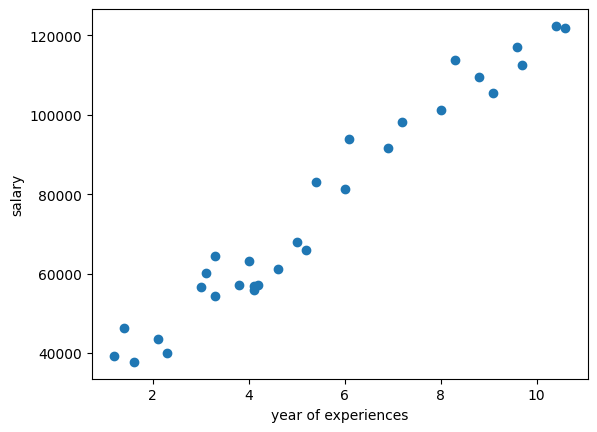

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.ylabel('salary')
plt.xlabel('year of experiences')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0



**divide into dependent and independent features:**

In [ ]:
x=df['YearsExperience']
x.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [ ]:
y=df['Salary']
y.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [ ]:
x.shape

(30,)

In [ ]:
y.shape

(30,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape , y_train.shape

((24,), (24,))

In [ ]:
x_test.shape , y_test.shape

((6,), (6,))

In [ ]:
x_train

,YearsExperience
27,9.7
11,4.1
17,5.4
22,8.0
5,3.0
16,5.2
8,3.3
14,4.6
23,8.3
20,6.9


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train.values.reshape(-1, 1))


In [ ]:
x_train

array([[ 1.75832984],
       [-0.40973925],
       [ 0.09356251],
       [ 1.10016601],
       [-0.83560996],
       [ 0.01613147],
       [-0.7194634 ],
       [-0.21616165],
       [ 1.21631257],
       [ 0.6742953 ],
       [-1.45505827],
       [ 2.10676952],
       [-0.79689444],
       [-1.1066186 ],
       [ 0.32585562],
       [ 0.36457114],
       [-0.52588581],
       [-0.7194634 ],
       [ 1.52603672],
       [-1.18404964],
       [-1.53248931],
       [ 0.79044186],
       [-0.06129957],
       [-0.40973925]])

In [ ]:
x_test = scaler.transform(x_test.values.reshape(-1, 1))


In [ ]:
x_test

array([[-1.37762723],
       [ 2.02933848],
       [-0.37102373],
       [-0.44845477],
       [ 1.71961432],
       [ 1.40989017]])

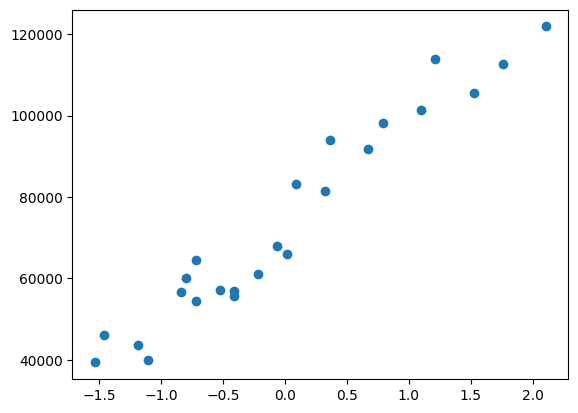

In [ ]:
plt.scatter(x_train,y_train)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Regress=LinearRegression()


In [ ]:
Regress.fit(x_train,y_train)

LinearRegression()

In [ ]:
Regress.intercept_

np.float64(73887.20833333334)

In [ ]:
Regress.coef_

array([24053.85556857])

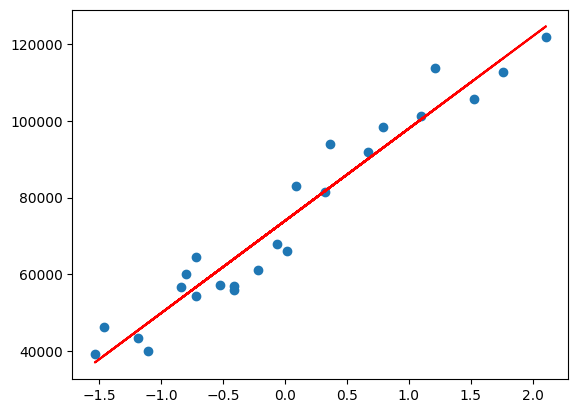

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,Regress.predict(x_train) ,'red')

In [ ]:
# Prediction for Test data

y_predict_test=Regress.predict(x_test)



In [ ]:
y_predict_test

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [ ]:
y_test

,Salary
2,37732.0
28,122392.0
13,57082.0
10,63219.0
26,116970.0
24,109432.0


In [ ]:
# MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score


In [ ]:
mse=mean_squared_error(y_test,y_predict_test)
mse

12823412.298126511

In [ ]:
mae = mean_absolute_error(y_test ,y_predict_test)
mae

2446.1723690465005

In [ ]:
rmse=np.sqrt(mse)
rmse

np.float64(3580.979237321338)

In [ ]:
# To check Accuracy

a=r2_score(y_test,y_predict_test)
a

0.988169515729126

In [ ]:
1 - (1 - a) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)


0.9852118946614076